In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #to ignore pandas warning
import numpy as np
import pandas as pd
from NeuralNetwork import *
from utils import *


## Data Processing

### Applying One-Hot Encoding and Shuffling

In [2]:
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]
tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)

tr_data = process_monk_data(tr_data)
test_data = process_monk_data(test_data)

print(test_data)

     Class        ID  a1_1  a1_2  a1_3  a2_1  a2_2  a2_3  a3_1  a3_2  a4_1  \
0        0  data_155     0     1     0     1     0     0     1     0     0   
1        1  data_391     0     0     1     0     0     1     1     0     1   
2        0   data_55     1     0     0     0     1     0     1     0     1   
3        1  data_200     0     1     0     0     1     0     1     0     1   
4        1   data_11     1     0     0     1     0     0     1     0     0   
..     ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
427      0  data_324     0     0     1     1     0     0     0     1     0   
428      1  data_193     0     1     0     0     1     0     1     0     1   
429      0  data_118     1     0     0     0     0     1     1     0     0   
430      1   data_48     1     0     0     1     0     0     0     1     0   
431      0  data_173     0     1     0     1     0     0     0     1     1   

     a4_2  a4_3  a5_1  a5_2  a5_3  a5_4  a6_1  a6_2  
0       1

# Training

## Monk1

#### Gridsearch per trovare i migliori hyperparametri


In [3]:
%%time


grid={
    "eta" : [0.001,0.005,0.01,0.05,0.1],
    "mb" : [1],
    "momentum" : [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95],
    "n_layers" : [1],
    "n_neurons" : [3,4],
    "epochs" : [300],
    "clip_value" : [None],
    "hid_act_fun" : ["tanh"],
    "out_act_fun" : ["tanh"],
    "cost_fun" : ["mse"],
    "ridge_lambda": [None],
    "lasso_lambda": [None],
    "decay_max_steps": [None],
    "decay_epochs_update": [None]}
    

search_space = get_search_space(grid)

print(len(search_space))
r = []

grid_results = parallel_grid_search(5, tr_data, search_space, n_inputs = tr_data.shape[1] - 2, n_outputs=1)

print(grid_results)



110
GRID SEARCH FINISHED
[{'eta': 0.01, 'mb': 1, 'momentum': 0.95, 'n_layers': 1, 'n_neurons': 3, 'epochs': 300, 'clip_value': None, 'hid_act_fun': 'tanh', 'out_act_fun': 'tanh', 'cost_fun': 'mse', 'ridge_lambda': None, 'lasso_lambda': None, 'decay_max_steps': None, 'decay_epochs_update': None}, 1.295501236184075e-05]
CPU times: total: 109 ms
Wall time: 1h 19min 23s


#### Varianza e media su 10 inizializzazioni per i pesi del network + plot

end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
end Training
1.0
MSE: mean = 0.00036917395108066874, std = 0.0002929417819557312
Accuracy: mean = 1.0, std = 0.0


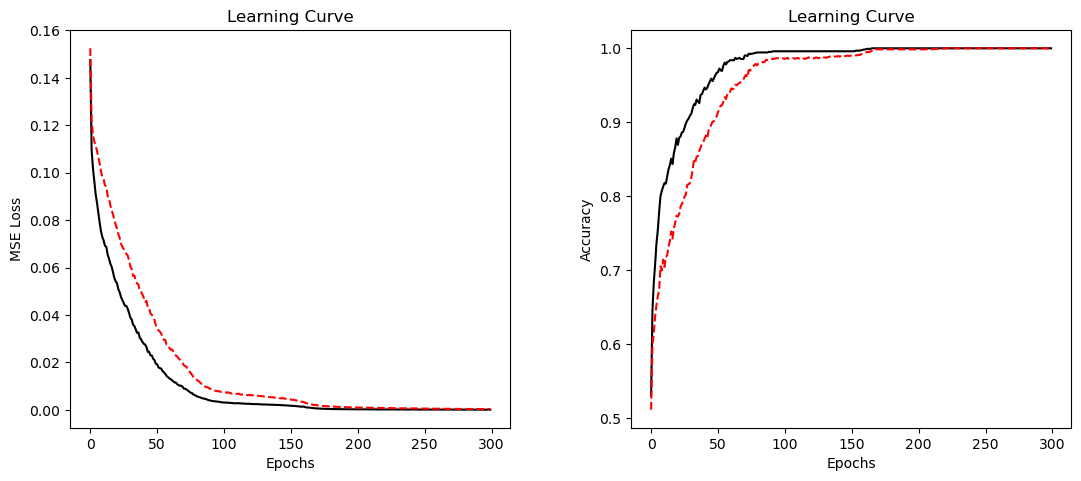

CPU times: total: 10min 3s
Wall time: 10min 3s


In [52]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]
fig,axs = plt.subplots(1,2,figsize=(12,6))

def plot_loss(losses: np.ndarray, cost_fun: str,ax,test_losses=None):
    iterations = np.arange(len(losses))
    ax.set_title("Learning Curve")
    ax.set_xlabel("Epochs")
    if cost_fun == "mse":
        ax.set_ylabel("MSE Loss")
    elif cost_fun == "b_ce":
        ax.set_ylabel("Cross Entropy Loss")
    elif cost_fun == "acc":
        ax.set_ylabel("Accuracy")

    ax.plot(iterations, losses, color="black")
    if test_losses is not None:
        iterations = np.arange(len(test_losses))
        ax.plot(iterations, test_losses, color="red",linestyle='--')


tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.00075,
    "mb" : 1,
    "momentum" : 0.98,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "tanh",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test)
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train
    print(acc_test[-1])

print(f"MSE: mean = {np.mean(test_errors[:,-1])}, std = {np.std(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, std = {np.std(acc_test_errors[:,-1])}")

#si calcola la media su n modelli per epochs epoche e si plotta il risultato
training_errors= np.mean(training_errors,axis=0)
test_errors= np.mean(test_errors, axis=0)
acc_train_errors= np.mean(acc_train_errors,axis=0)
acc_test_errors= np.mean(acc_test_errors, axis=0)
plot_loss(training_errors,"mse",axs[0],test_losses=test_errors)
plot_loss(acc_train_errors,"acc",axs[1],test_losses=acc_test_errors)

fig.tight_layout(pad=5.0)
plt.show()

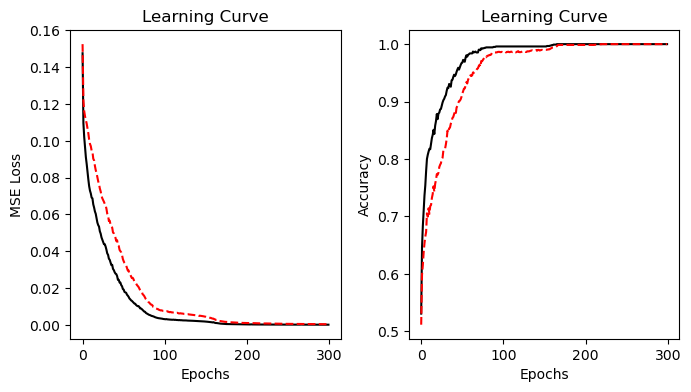

In [57]:
fig,axs = plt.subplots(1,2,figsize=(7,4))
plot_loss(training_errors,"mse",axs[0],test_losses=test_errors)
plot_loss(acc_train_errors,"acc",axs[1],test_losses=acc_test_errors)
fig.tight_layout(pad=1.0)